In [18]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format= "retina"
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [14]:
covid= pd.read_csv(r'owid-covid-data-updated-till-mar24.csv', usecols=['location','date','total_cases','continent'],parse_dates=['date'])
sp500= pd.read_csv(r'^GSPC.csv', parse_dates=['Date'])

In [11]:
covid.head()

,continent,location,date,total_cases
0,Asia,Afghanistan,2020-02-24,1.0
1,Asia,Afghanistan,2020-02-25,1.0
2,Asia,Afghanistan,2020-02-26,1.0
3,Asia,Afghanistan,2020-02-27,1.0
4,Asia,Afghanistan,2020-02-28,1.0


In [16]:
sp500.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0


In [19]:
covid['year']=covid['date'].dt.year

In [21]:
covid['month']=covid['date'].dt.month

In [22]:
covid['weekday']=covid['date'].dt.day_name()

In [90]:
#Pivot the covid data so it's in wide form
covid_pivot= pd.pivot_table(covid, index=['weekday'],values=['total_cases'],columns=['month'],aggfunc=np.sum)

In [78]:
covid_pivot.head()

total_cases                                                      \
month               1             2             3           4           5    
weekday                                                                      
Friday    1.490306e+09  1.399823e+09  1.148045e+09  26455607.0  74521266.0   
Monday    1.186318e+09  1.376831e+09  1.527404e+09  29456324.0  58642251.0   
Saturday  1.500124e+09  1.404765e+09  1.152953e+09  27386993.0  76048366.0   
Sunday    1.507965e+09  1.408758e+09  1.157277e+09  28525246.0  77357386.0   
Thursday  1.213306e+09  1.393834e+09  1.142840e+09  36182621.0  62155126.0   

                                                                           \
month              6            7            8            9            10   
weekday                                                                     
Friday    103515321.0  219987486.0  271797512.0  364398169.0  618162226.0   
Monday    128544151.0  173258800.0  336791251.0  374146569.0  488699706.0   
Saturday  105345290.0  168439559.0  329955670.0  367911581.0  624694044.0   
Sunday    106965694.0  170859569.0  333286653.0  370924098.0  483837859.0   
Thursday  101601418.0  216208019.0  268326932.0  360362827.0  611091842.0   

                                     
month              11            12  
weekday                              
Friday    706192328.0  9.332189e+08  
Monday    875333168.0  9.539443e+08  
Saturday  713958732.0  9.408593e+08  
Sunday    866616576.0  9.473284e+08  
Thursday  697432908.0  1.191181e+09

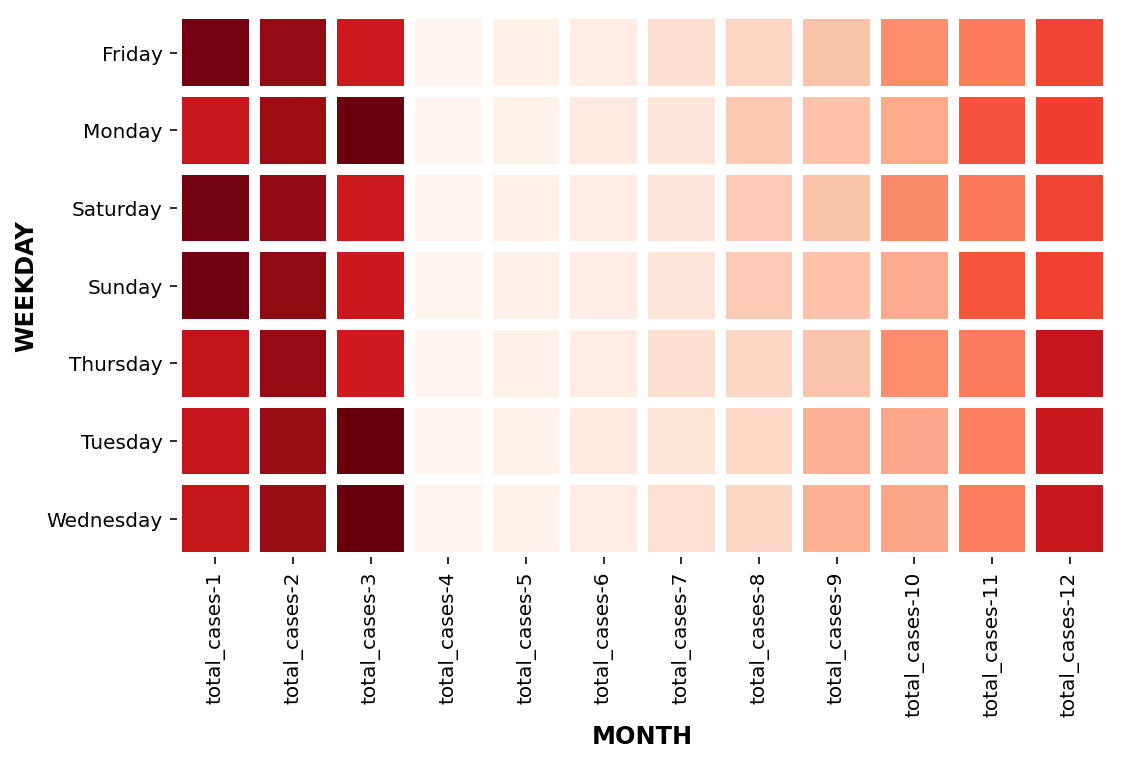

In [152]:
fig,ax= plt.subplots(figsize=(14,5))
sns.heatmap(covid_pivot, linewidth=5,cmap="Reds",linecolor='white',square=True,cbar=False,ax=ax)
plt.xlabel('MONTH',fontweight='bold',fontsize=12)
plt.ylabel('WEEKDAY',fontweight='bold',fontsize=12)
plt.show()

In [36]:
sp500['year']=sp500['Date'].dt.year

In [37]:
sp500['month']=sp500['Date'].dt.month

In [38]:
sp500['weekday']=sp500['Date'].dt.day_name()

In [39]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,weekday
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927,12,Friday
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928,1,Tuesday
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928,1,Wednesday
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928,1,Thursday
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928,1,Friday


In [80]:
#Pivot the sp500 data so it's in wide form
sp500_pivot= pd.pivot_table(sp500, index=['weekday'],values=['Volume'],columns=['month'],aggfunc=np.sum)

In [81]:
sp500_pivot.head()

Volume                                            \
month                1             2             3             4    
weekday                                                             
Friday     315497250000  294250900000  328852420000  257215360000   
Monday     214786300000  207959840000  320987730000  290398380000   
Thursday   329973690000  292487390000  339188290000  324312990000   
Tuesday    308400680000  289644220000  333807170000  313174360000   
Wednesday  322291690000  291793780000  332000240000  325954120000   

                                                                   \
month                5             6             7             8    
weekday                                                             
Friday     311202560000  344475520000  273866930000  291283760000   
Monday     230115250000  292324780000  264104570000  279273850000   
Thursday   330237630000  306814950000  311576210000  303004960000   
Tuesday    322812080000  302215100000  306908230000  288041510000   
Wednesday  331606150000  303195750000  308645840000  309543170000   

                                                                   
month                9             10            11            12  
weekday                                                            
Friday     313195940000  316053430000  264628030000  283518900000  
Monday     224604860000  282563720000  275686930000  260909710000  
Thursday   303965860000  330894270000  248597930000  272515110000  
Tuesday    306239010000  309251970000  299842420000  270432730000  
Wednesday  303291830000  329772590000  298988960000  268005580000

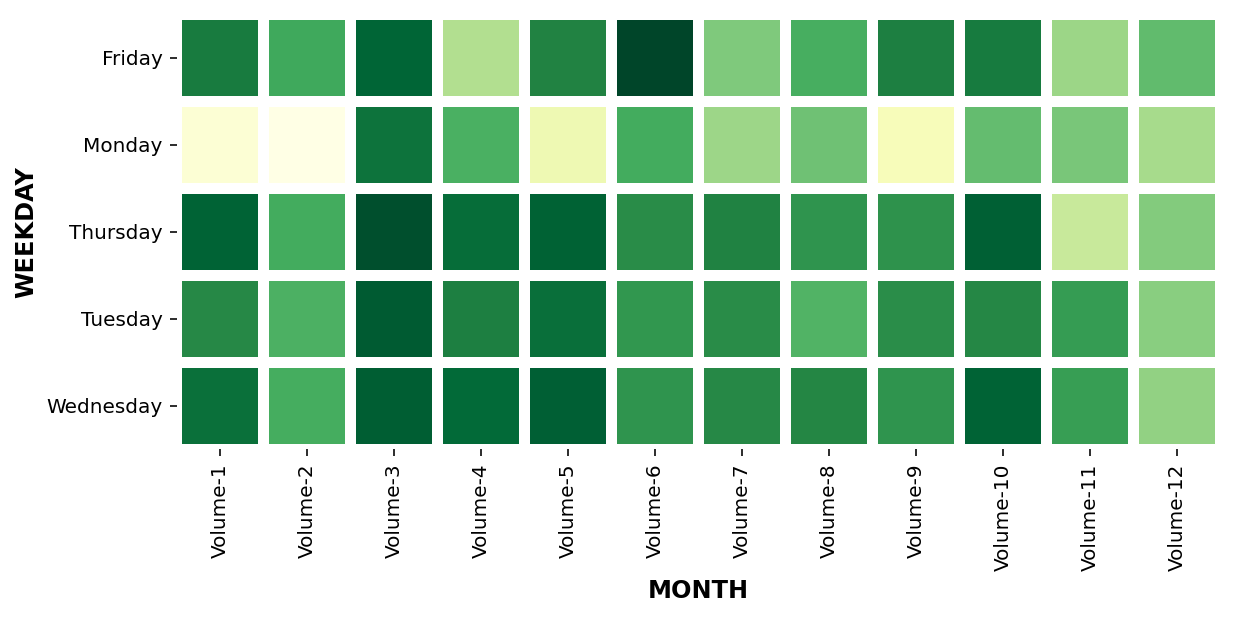

In [153]:
fig,ax= plt.subplots(figsize=(14,4))
sns.heatmap(sp500_pivot, linewidth=5,cmap="YlGn",linecolor='white',square=True,cbar=False,ax=ax)
plt.xlabel('MONTH',fontweight='bold',fontsize=12)
plt.ylabel('WEEKDAY',fontweight='bold',fontsize=12)
plt.savefig('sp500.png',format='png');
plt.show();
